In [2]:
import sys
import pickle
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("classic")
import seaborn as sns
from scipy import stats

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [263]:
pp = pprint.PrettyPrinter(indent=4)
sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 150

# Task 1: Select Features

- Task 1: Select what features you'll use.
- features_list is a list of strings, each of which is a feature name.
- The first feature must be "poi".

In [6]:
features_list = [
    "poi",
    "salary",
    "bonus",
    "long_term_incentive",
    "exercised_stock_options",
    "total_payments",
]  # You will need to use more features

In [235]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# display(data_dict)
list(data_dict.items())[0]

('METTS MARK',
 {'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062})

In [231]:
discovery_df = pd.DataFrame(data_dict).transpose()
display(discovery_df.head())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [232]:
discovery_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,42,40,45,18,112,102,95,65,58,42,5,53,93,2,98,19,95,84,87,126,125
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,107,97,129,35,44,51,60,60,60,142,80,53,128,36,128,51,60,60,21,20


In [234]:
# define 'NaN' strings as numpy NaNs
discovery_df[discovery_df == 'NaN'] = np.nan

# sort the features by the % NaN values for the feature
((discovery_df.isna().sum() / len(discovery_df.index)) * 100).sort_values()

poi                          0.00
total_stock_value           13.70
total_payments              14.38
email_address               23.97
restricted_stock            24.66
exercised_stock_options     30.14
salary                      34.93
expenses                    34.93
other                       36.30
to_messages                 41.10
shared_receipt_with_poi     41.10
from_messages               41.10
from_poi_to_this_person     41.10
from_this_person_to_poi     41.10
bonus                       43.84
long_term_incentive         54.79
deferred_income             66.44
deferral_payments           73.29
restricted_stock_deferred   87.67
director_fees               88.36
loan_advances               97.26
dtype: float64

Interesting to note that every POI has a value for the POI feature

# Task 2: Remove outliers

In [302]:
# remove the TOTAL key from the dict because it's an outlier in the data
# TOTAL represents an aggregate value
# 'THE TRAVEL AGENCY IN THE PARK' doesn't represent a person
df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'])

numRows, numCols = df.shape

# transpose the DF if the features are set as rows
if numRows < numCols:
    df = pd.DataFrame(df).transpose()

df[features_list].head()

,poi,salary,bonus,long_term_incentive,exercised_stock_options,total_payments
ALLEN PHILLIP K,False,201955,4175000,304805,1729541,4484442
BADUM JAMES P,False,NaN,NaN,NaN,257817,182466
BANNANTINE JAMES M,False,477,NaN,NaN,4046157,916197
BAXTER JOHN C,False,267102,1200000,1586055,6680544,5634343
BAY FRANKLIN R,False,239671,400000,NaN,NaN,827696


In [290]:
def summarizeFeature(feature):
    print "\nSUMMARY FOR: '{}'".format(feature.upper())
    print "=" * 25
    print(df[feature].astype(np.float64).describe())
    print
    
# summarize selected features (except for POI)    
for feature in features_list[1:]:
    summarizeFeature(feature)    


SUMMARY FOR: 'SALARY'
count         95.00
mean      562194.29
std      2716369.15
min          477.00
25%       211816.00
50%       259996.00
75%       312117.00
max     26704229.00
Name: salary, dtype: float64


SUMMARY FOR: 'BONUS'
count         82.00
mean     2374234.61
std     10713327.97
min        70000.00
25%       431250.00
50%       769375.00
75%      1200000.00
max     97343619.00
Name: bonus, dtype: float64


SUMMARY FOR: 'LONG_TERM_INCENTIVE'
count         66.00
mean     1470361.45
std      5942759.32
min        69223.00
25%       281250.00
50%       442035.00
75%       938672.00
max     48521928.00
Name: long_term_incentive, dtype: float64


SUMMARY FOR: 'EXERCISED_STOCK_OPTIONS'
count         102.00
mean      5987053.77
std      31062006.57
min          3285.00
25%        527886.25
50%       1310813.50
75%       2547724.00
max     311764000.00
Name: exercised_stock_options, dtype: float64


SUMMARY FOR: 'TOTAL_PAYMENTS'
count         125.00
mean      5081526.49
std      

In [291]:
def plotData(data_dict, features, xLabel, yLabel):
    data = featureFormat(data_dict, features=features)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    feature_x, feature_y = features

    zScores = abs(stats.zscore(data, axis=0))

    #  plot data points
    for index, (x, y) in enumerate(data):
        xZ, yZ = zScores[index]
        plt.scatter(x, y)
        
        # annotate the data point if X or Y is greater than 2 Stdevs.
        if xZ > 2 or yZ > 2:
            # find the person associated with the data point
            poi_name = next((key for (key, value) in data_dict.items() if value.get(feature_x) == x or value.get(feature_y) == y), None)
            
            ax.annotate("%s" % (poi_name), xy=(x, y), textcoords="data")

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.grid()
    plt.figure()

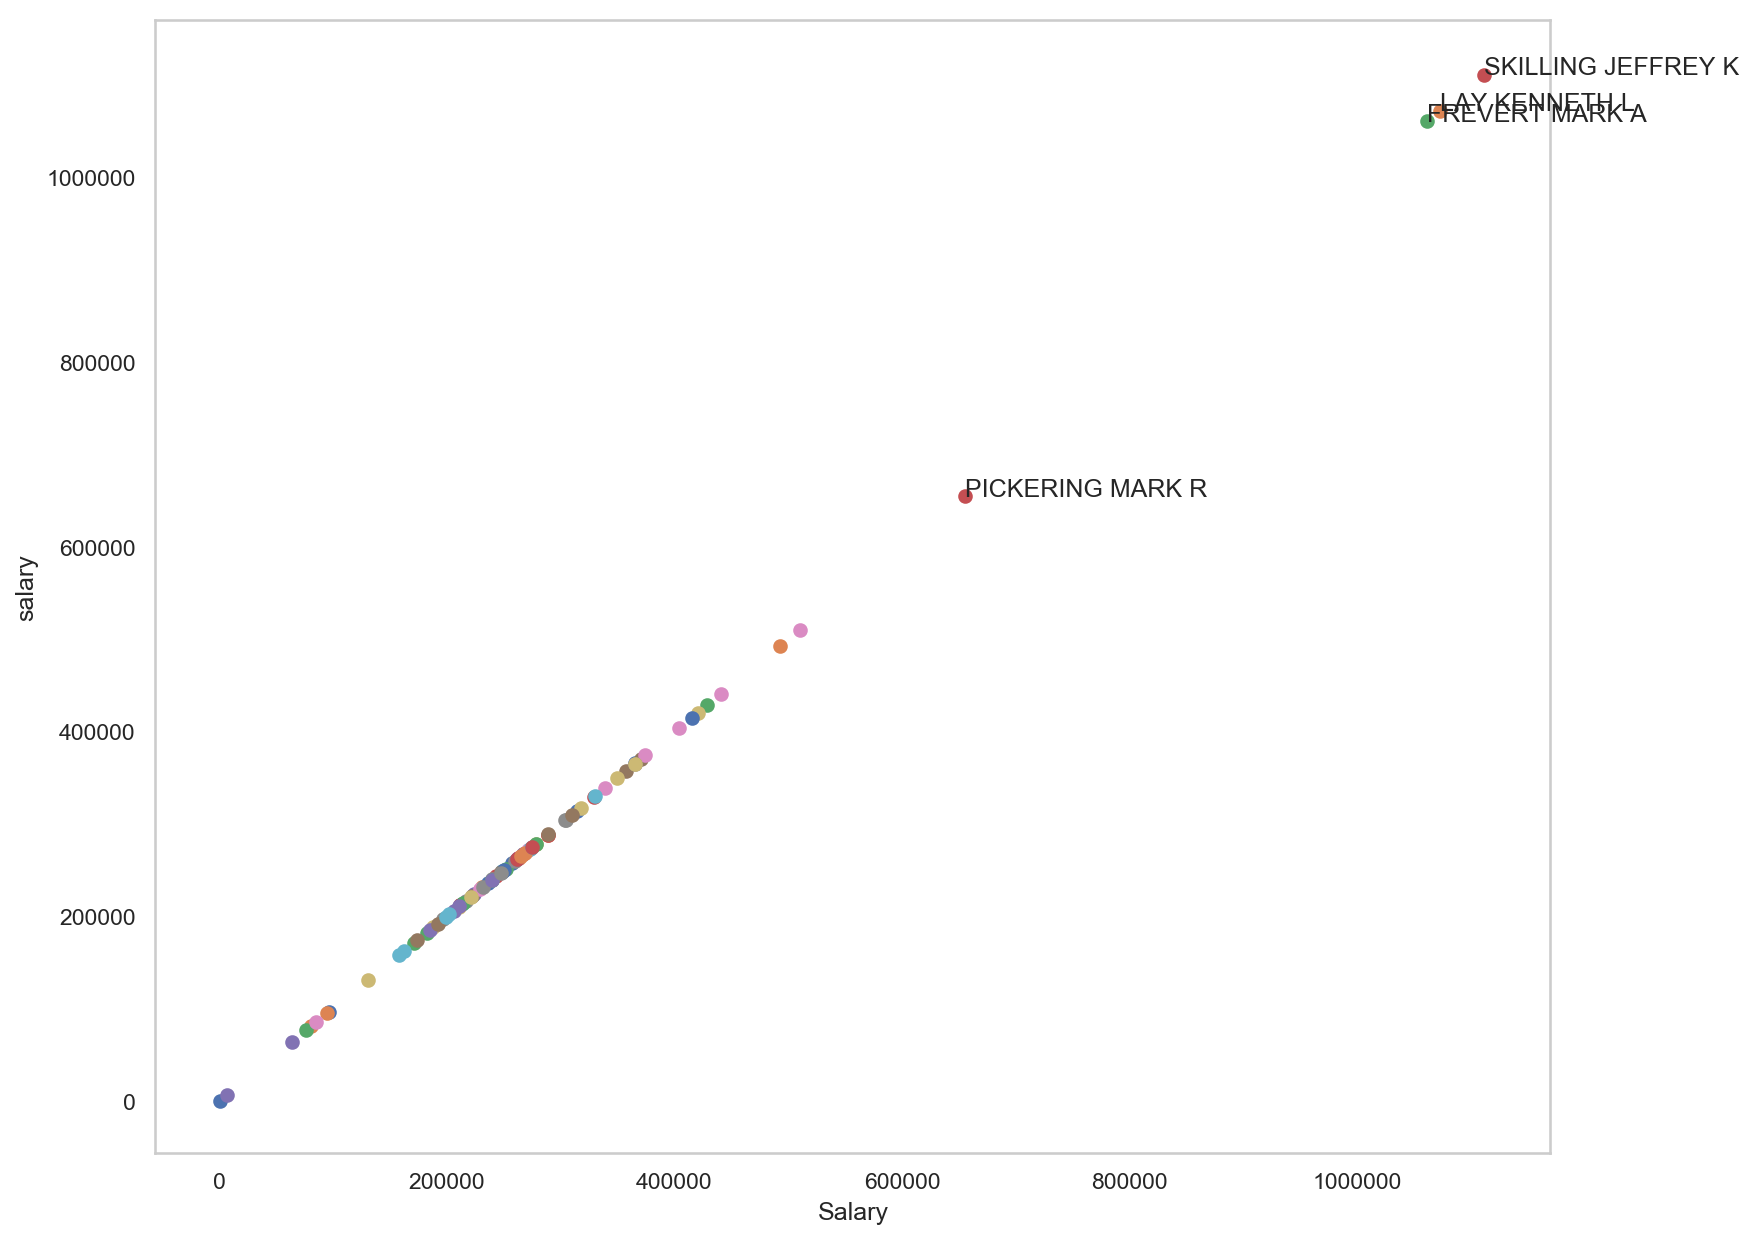

<Figure size 1800x1500 with 0 Axes>

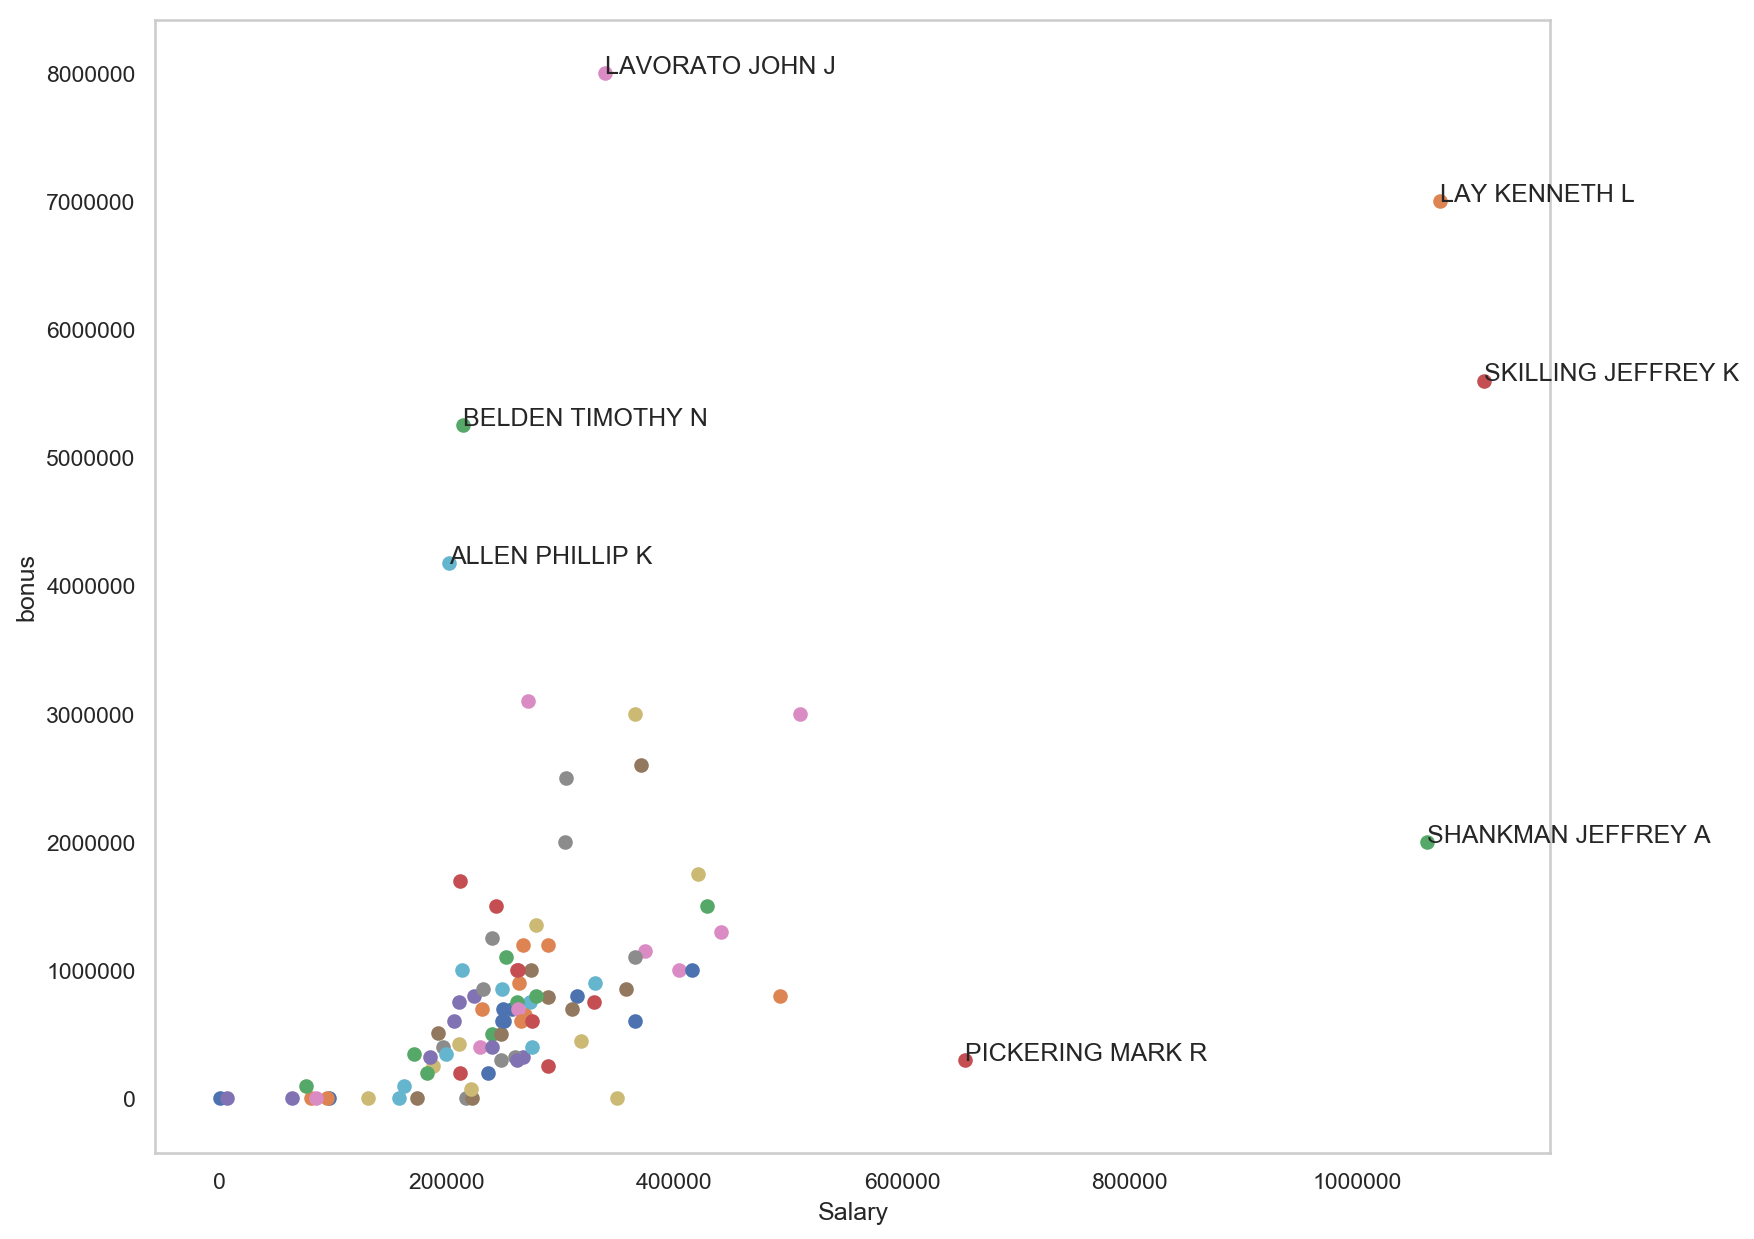

<Figure size 1800x1500 with 0 Axes>

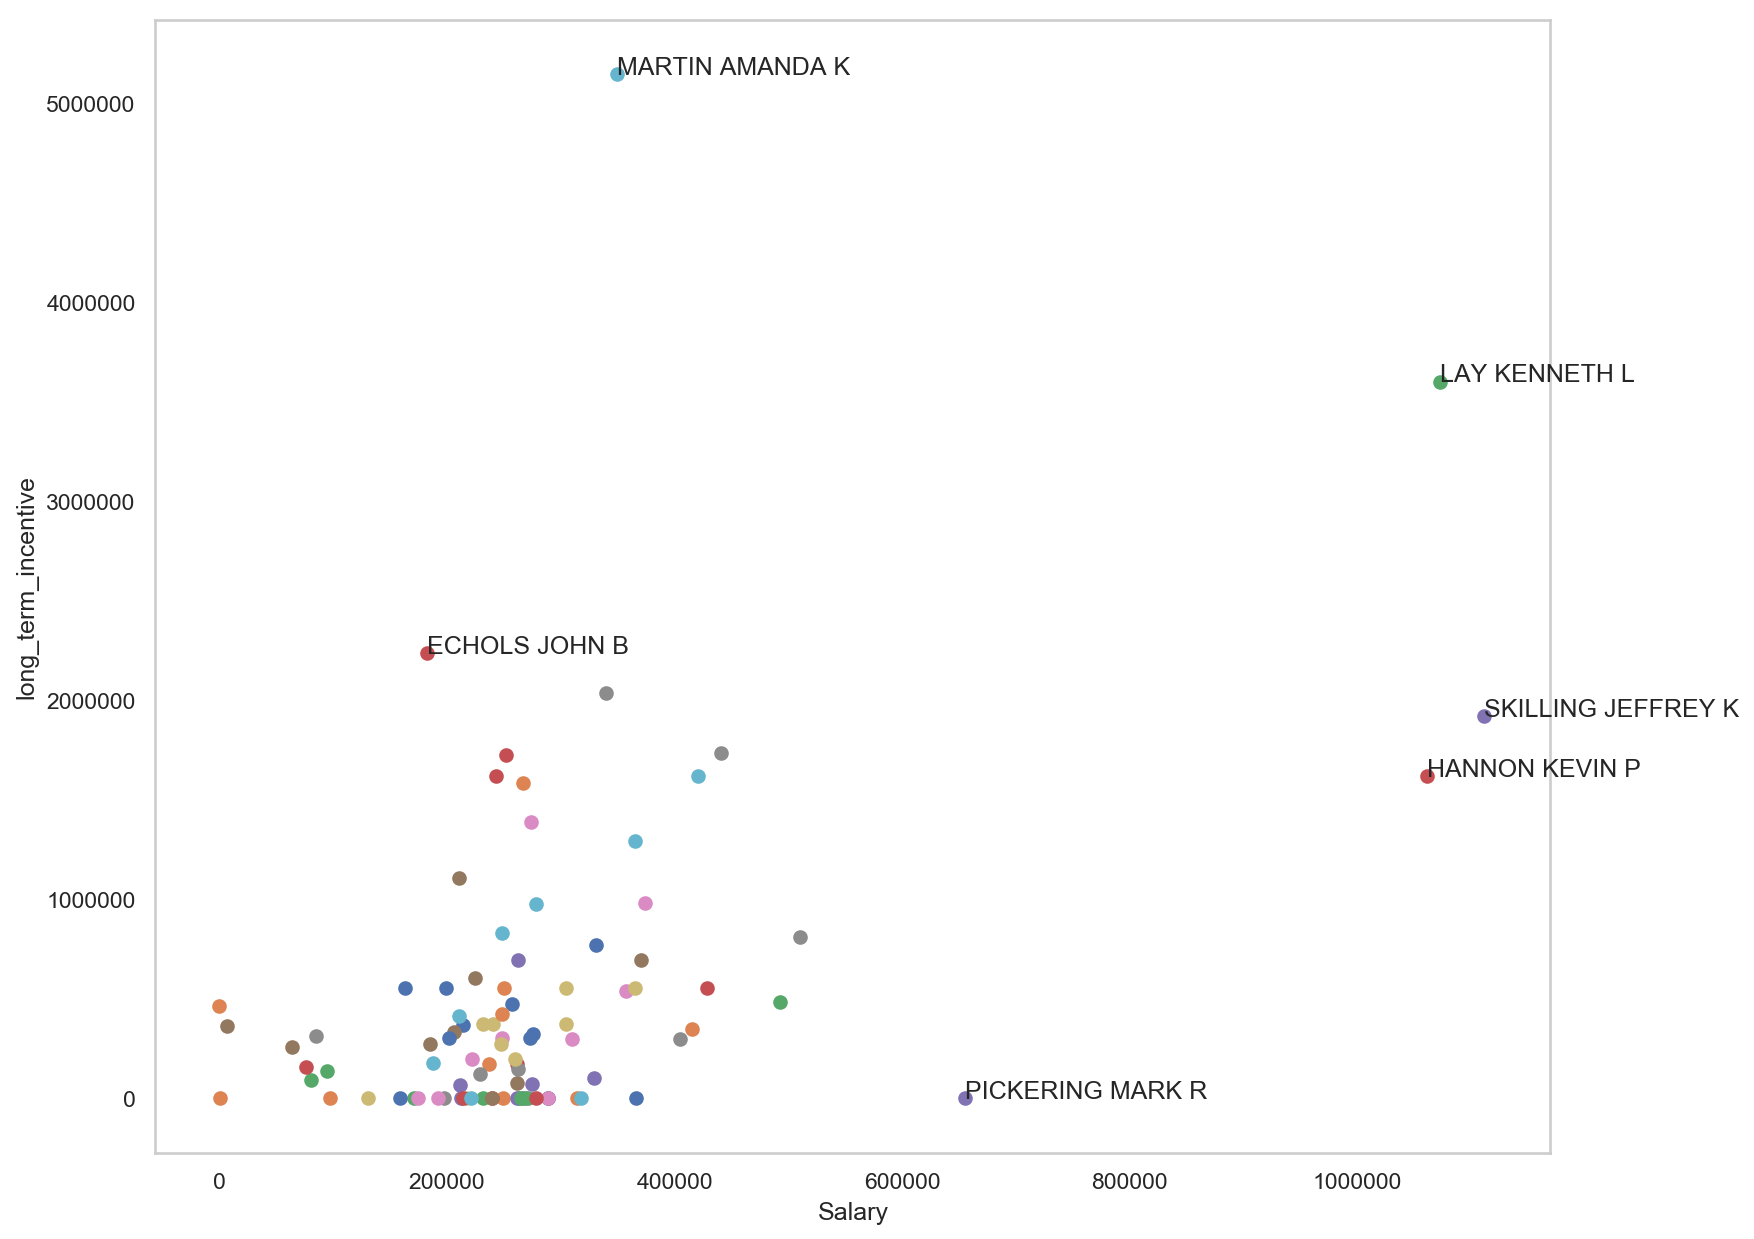

<Figure size 1800x1500 with 0 Axes>

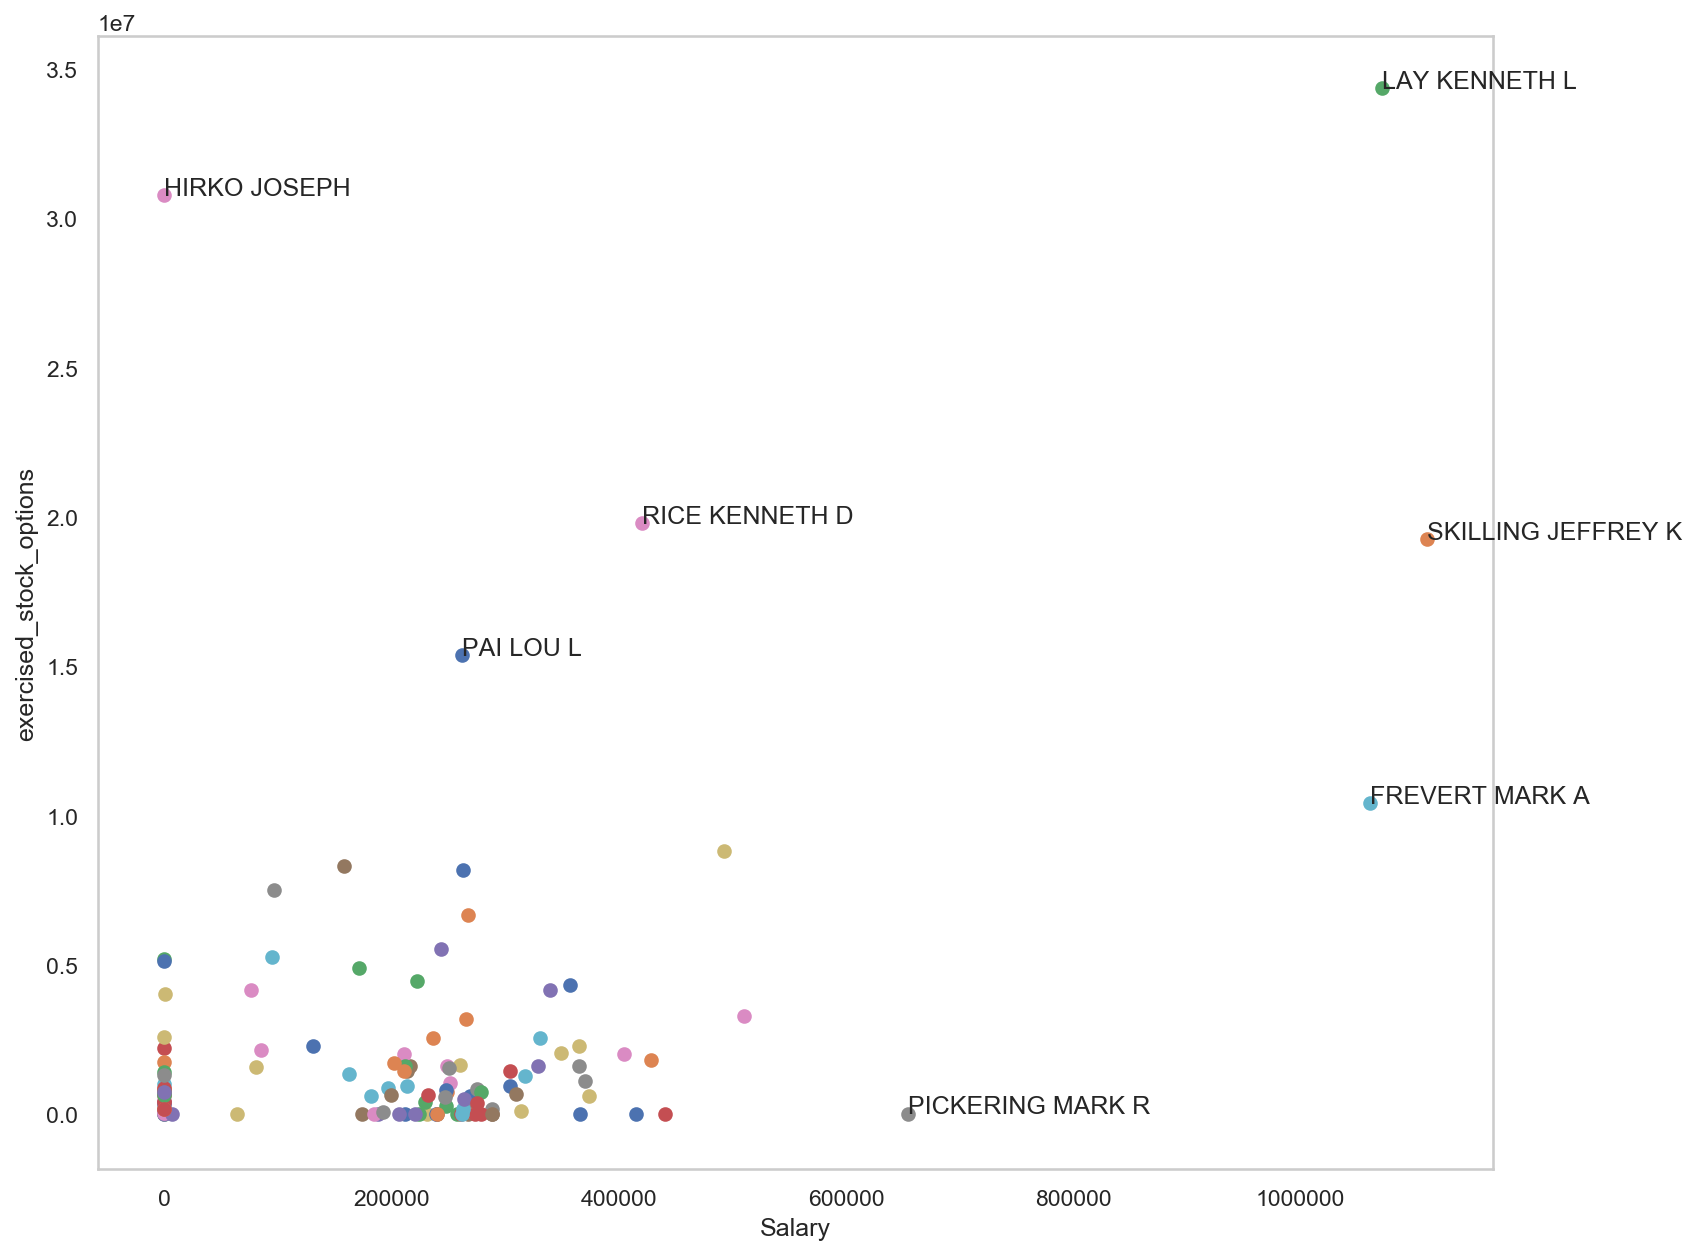

<Figure size 1800x1500 with 0 Axes>

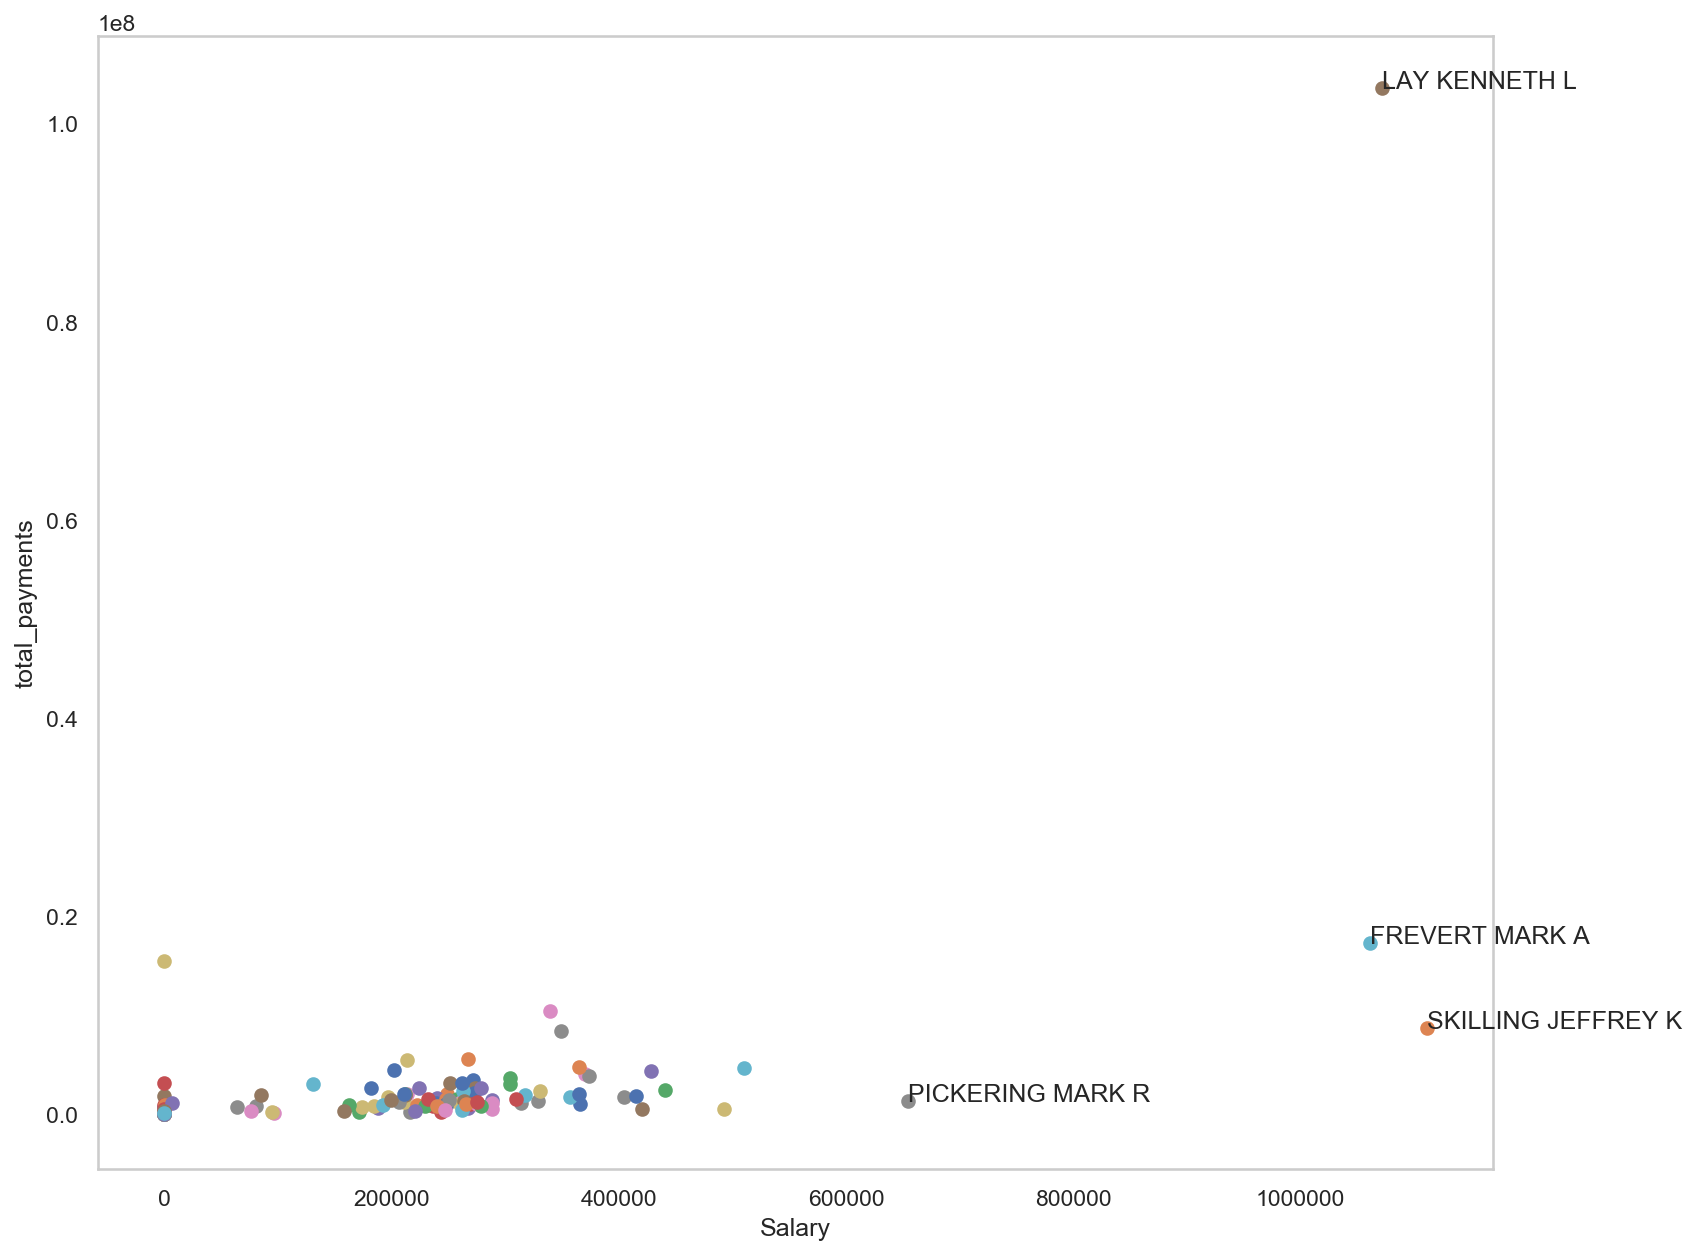

<Figure size 1800x1500 with 0 Axes>

In [292]:
# plot selected features (except for POI)    
for feature in features_list[1:]:
    plotData(data_dict, features=["salary", feature], xLabel="Salary", yLabel=feature)
    
plt.show()

In [293]:
from pandas.io.json import json_normalize

salary_df = df[df.salary != 'NaN']
bonus_df = df[df.bonus != 'NaN']
long_term_incentive_df = df[df.long_term_incentive!= 'NaN']
exercised_stock_options_df = df[df.exercised_stock_options != 'NaN']
total_payments_df = df[df.total_payments != 'NaN']

total_payments_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,NaN,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,NaN,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,NaN,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,NaN,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616
